# 波士顿房价预测

In [4]:
from keras.datasets import boston_housing
from keras import layers
from keras import models

Using TensorFlow backend.


In [16]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape, train_data[0])
print(train_targets.shape, train_targets[:13])

(404, 13) [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
(404,) [15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1]


## 数据标准化

In [17]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
print('mean:', mean)
print('std:', std)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

mean: [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
std: [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


## 构建网络

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [25]:
history = model.fit(test_data, test_targets, epochs=50, batch_size=20)
print(history.history)

Epoch 1/50
102/102 [==============================] - 0s 481us/step - loss: 7.5350 - mean_absolute_error: 2.1291
Epoch 2/50
102/102 [==============================] - 0s 117us/step - loss: 7.2591 - mean_absolute_error: 2.0947
Epoch 3/50
102/102 [==============================] - 0s 104us/step - loss: 7.3494 - mean_absolute_error: 2.0768
Epoch 4/50
102/102 [==============================] - 0s 109us/step - loss: 7.3459 - mean_absolute_error: 2.0726
Epoch 5/50
102/102 [==============================] - 0s 152us/step - loss: 7.8010 - mean_absolute_error: 2.1470
Epoch 6/50
102/102 [==============================] - 0s 159us/step - loss: 6.9954 - mean_absolute_error: 2.0357
Epoch 7/50
102/102 [==============================] - 0s 152us/step - loss: 7.1719 - mean_absolute_error: 2.0404
Epoch 8/50
102/102 [==============================] - 0s 110us/step - loss: 7.0856 - mean_absolute_error: 2.0047
Epoch 9/50
102/102 [==============================] - 0s 96us/step - loss: 7.3036 - mean_absolut

In [26]:
model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 48us/step


[5.407040596008301, 1.7394323302250283]

In [27]:
model.predict(test_data[:10])

array([[ 7.4972486],
       [19.036987 ],
       [21.92217  ],
       [30.015196 ],
       [25.699911 ],
       [22.618343 ],
       [27.802773 ],
       [21.468193 ],
       [19.95924  ],
       [21.856903 ]], dtype=float32)

## 编写生成网络的函数

In [29]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## K折验证

In [47]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k #//取整运算符
num_epochs = num_val_samples
maes = []

for i in range(k):
    print('processing fold #', i)

    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], 
                                        train_data[(i+1)*num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], 
                                           train_targets[(i+1)*num_val_samples:]],
                                           axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, 
              epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets)
    maes.append(val_mae)
    
mae = np.mean(maes)
print(maes, mae)

processing fold # 0
101/101 [==============================] - 0s 478us/step
processing fold # 1
101/101 [==============================] - 0s 539us/step
processing fold # 2
101/101 [==============================] - 0s 590us/step
processing fold # 3
101/101 [==============================] - 0s 752us/step
[2.2301889386507545, 2.911705732345581, 2.549024322245381, 2.4523563585659063] 2.5358188379519055


## epochs = 500

In [49]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k #//取整运算符
num_epochs = 500
mae_histories = []

for i in range(k):
    print('processing fold #', i)

    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], 
                                        train_data[(i+1)*num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], 
                                           train_targets[(i+1)*num_val_samples:]],
                                           axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    print(history.history.keys())
    mae_histories.append(history.history['val_mean_absolute_error'])

processing fold # 0
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
processing fold # 1
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
processing fold # 2
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
processing fold # 3
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


In [73]:
#计算每轮K折的平均值
print(len(mae_histories), len(mae_histories[0]))
avg_mae_history = [np.mean([n[i] for n in mae_histories]) for i in range(num_epochs)]
print(len(avg_mae_history), avg_mae_history[:5])

4 500
500 [4.572459154789991, 3.484032404304731, 3.0523584927662766, 2.8337494028676855, 2.7011462733297065]


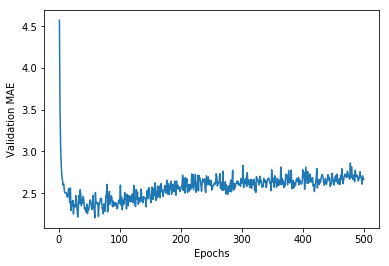

In [77]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(avg_mae_history)+1), avg_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

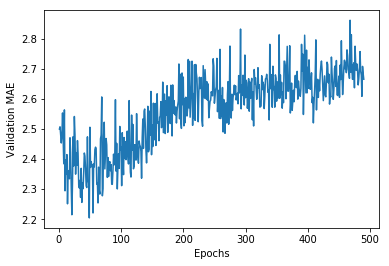

In [84]:
#把前面10个异常值移除
after_avg_mae_history_10 = avg_mae_history[10:]
plt.plot(range(1, len(after_avg_mae_history_10)+1), after_avg_mae_history_10)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## 通过指数移动平均值，以得到光滑的曲线。

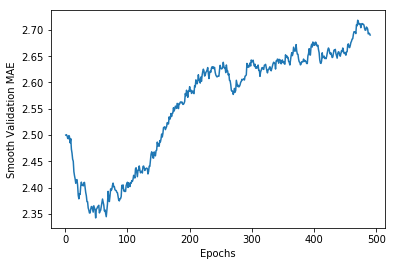

In [86]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous_point = smoothed_points[-1]
            smoothed_points.append(previous_point * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(avg_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Smooth Validation MAE')
plt.show()

## 训练最终模型

In [88]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

Epoch 1/80
404/404 [==============================] - 0s 1ms/step - loss: 499.3758 - mean_absolute_error: 20.5589
Epoch 2/80
404/404 [==============================] - 0s 92us/step - loss: 320.9097 - mean_absolute_error: 15.9049
Epoch 3/80
404/404 [==============================] - 0s 93us/step - loss: 157.2370 - mean_absolute_error: 10.2177
Epoch 4/80
404/404 [==============================] - 0s 98us/step - loss: 71.6150 - mean_absolute_error: 6.4269
Epoch 5/80
404/404 [==============================] - 0s 92us/step - loss: 42.0901 - mean_absolute_error: 4.7804
Epoch 6/80
404/404 [==============================] - 0s 94us/step - loss: 29.0782 - mean_absolute_error: 3.8404
Epoch 7/80
404/404 [==============================] - 0s 98us/step - loss: 24.5099 - mean_absolute_error: 3.4223
Epoch 8/80
404/404 [==============================] - 0s 92us/step - loss: 21.5219 - mean_absolute_error: 3.2005
Epoch 9/80
404/404 [==============================] - 0s 92us/step - loss: 19.5780 - mean_a

Epoch 73/80
404/404 [==============================] - 0s 91us/step - loss: 6.5081 - mean_absolute_error: 1.7829
Epoch 74/80
404/404 [==============================] - 0s 103us/step - loss: 6.6042 - mean_absolute_error: 1.8063
Epoch 75/80
404/404 [==============================] - 0s 120us/step - loss: 6.4488 - mean_absolute_error: 1.7811
Epoch 76/80
404/404 [==============================] - 0s 127us/step - loss: 6.4747 - mean_absolute_error: 1.7777
Epoch 77/80
404/404 [==============================] - 0s 131us/step - loss: 6.4173 - mean_absolute_error: 1.8089
Epoch 78/80
404/404 [==============================] - 0s 132us/step - loss: 6.5012 - mean_absolute_error: 1.7932
Epoch 79/80
404/404 [==============================] - 0s 128us/step - loss: 6.3873 - mean_absolute_error: 1.7510
Epoch 80/80
102/102 [==============================] - 0s 2ms/step
2.8483812668744255


In [90]:
#加入静默模式
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

102/102 [==============================] - 0s 1ms/step
2.7738957218095366


## 预测的房价和实际价格相差约2774美元

In [92]:
model.predict(test_data[:10])

array([[ 8.899015],
       [19.27545 ],
       [22.358284],
       [31.104116],
       [25.16299 ],
       [20.584179],
       [25.941074],
       [21.734365],
       [19.545227],
       [22.44271 ]], dtype=float32)